# Exam 4 - Key

**This exam is confidential and is not to be shared with anyone not in ChEn 263 Fall 2021**

In [1]:
# boilerplate import code, provided free of charge

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.integrate import quad, odeint
from scipy.optimize import fsolve, curve_fit

## Problem 1 (9 points)
The following ODE describes a process of interest $$\frac{dy}{dt} = ye^{-t}-\cos(t)$$ The initial condition is $y_0=\sqrt{2}$.
* Numerically solve $y$ for $0 \leq t \leq 9$.  
* Make a smooth and well-formatted plot of the solution

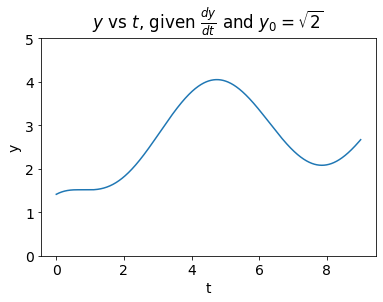

In [2]:
# Initial constants
a = 0
b = 9
N = 1000
Δt = (b-a)/N
y0 = np.sqrt(2)

# Derivative equation
def dy_by_dt(y, t):
    return y*np.exp(-1*t) - np.cos(t)

# Array spaces
t_vals = np.linspace(a, b, N)
y_vals = odeint(dy_by_dt, y0, t_vals)
    
# Plotting
plt.rc('font', size=14)
plt.title(r'$y$ vs $t$, given $\frac{dy}{dt}$ and $y_0 = \sqrt{2}$')
plt.ylabel('y')
plt.xlabel('t')
plt.ylim([0,5])
plt.plot(t_vals, y_vals);

## Problem 2 (12 points)
The following equation describes the change in entropy across a gas compressor $$\Delta S = \int_{T_1}^{T_2}\frac{C_p(T)}{T}~dT-R~\ln\left(\frac{P_2}{P_1} \right)$$ where $R$ is the ideal gas constant, $T$ is absolute temperature, $P$ is absolute pressure, and subscripts 1 and 2 indicate inlet and outlet respectively. The constant-pressure heat capacity $C_p$ as a function of temperature is already programmed below for methane (natural gas). 

If we can assume that $\Delta S=0$ (entropy is constant) for a natural gas compressor, then solve for outlet temperature $T_2$. The other inlet and outlet parameters are known: $T_1=300~\mathrm{K}$, $P_1=1~\mathrm{bar}$, and $P_2=30~\mathrm{bar}$. Perform your solution numerically using Python. You know from experience that when methane is compressed to this amount the temperature approximately doubles. 

Note that in numpy, the natural log is given by `np.log(...)`.

In [3]:
#----------------------------------------------------------------
# Function that gives the heat capacity (J/mol.K) for methane, 
# with T in Kelvin
# source: https://webbook.nist.gov/cgi/cbook.cgi?ID=C74828&Mask=1
def Cp(T):
    TT = T/1000.
    A = [-0.703029, 108.4773, -42.52157, 5.862788, 0.678565]
    return A[0] + A[1]*TT + A[2]*TT**2 + A[3]*TT**3 + A[4]*TT**-2
#----------------------------------------------------------------

# Define constants
R = 8.314                                        # J/K⋅mol
T1 = 300                                         # K
P1 = 1                                           # bar
P2 = 30                                          # bar
P2_over_P1 = 30/1                                # unitless

# Define required method
def ΔS(T2, T1, P_ratio):                         # J
    return quad(lambda T: Cp(T)/T, T1, T2)[0] - R*np.log(P_ratio)

# use fsolve to numerically find the solution 
T2 = fsolve(ΔS, 600, args=(T1, P2_over_P1))[0]   # K

# print out the solution
print('The outlet temperature of methane in a natural gas processor, given inlet temperature ({T1} K), inlet pressure ({P1} bar) and outlet pressure ({P2} bar) is approximately {T2:.0f} K'.format(
    T1 = T1,   # K
    T2 = T2,   # K
    P1 = P1,   # K
    P2 = P2    # K
))

The outlet temperature of methane in a natural gas processor, given inlet temperature (300 K), inlet pressure (1 bar) and outlet pressure (30 bar) is approximately 586 K


## Problem 3 (9 points)

$$y = x\ln\left(\frac{\pi}{2}-x \right)$$
$$\sin\left(2y+1\right)=x-1$$

The above two equations have more than one solution, each given by the pair $(x,y)$. Using Python find the one solution where $0<x<2$ and $-2<y<0$. Do not algebraically substitute one equation into the other, in other words, numerically solve both equations simultaneously.

In [9]:
def eq1(x, y):
    return x*np.log(np.pi/2 - x) - y

def eq2(x, y):
    return x - 1 - np.sin(2*y + 1)

def eq(xy):
    x = xy[0]
    y = xy[1]
    return (eq1(x, y), eq2(x, y))

xy_guess = np.array([1,-1])

xy = fsolve(eq, xy_guess)

print("The x and y values for which y = x*ln(pi/2 - x) and sin(2*y + 1) = x - 1 where [0 < x < 2], and [-2 < y < 0] are x = {X:.4f} and y = {Y:.4f}".format(
    X = xy[0],
    Y = xy[1]
))

The x and y values for which y = x*ln(pi/2 - x) and sin(2*y + 1) = x - 1 where [0 < x < 2], and [-2 < y < 0] are x = 0.9779 and y = -0.5111


## Problem 4 (15 points)

Due to thermal energy storage and transport in soil, it is found that soil temperature lags behind air temperature. Moreover, the average temperature in the soil varies with depth below ground level and the day of the year. It has been found that  at a particular depth below ground, the typical day of they year that the soil has its lowest temperature is 

| depth (ft) | Coldest day |
| :--------: | :---------: |
|     0      |     35      |
|     2      |     49      |
|     5      |     70      |
|    12      |     98      |

where day 1 is January 1 and day 365 is December 31.

* Plot the above data as points (depth on the _x axis_ and day on the _y axis_).
* Do a cubic spline interpolation on the data. Plot the spline as a smooth curve from depth of 0 to 12 feet.
* Use the spline you just made along with other code to rapidly and accurately estimate the depth (in ft) when the coldest day would be March 26 (day 85).


The depth at which the coldest day would be March 26th has been estimated to be 7.52 feet


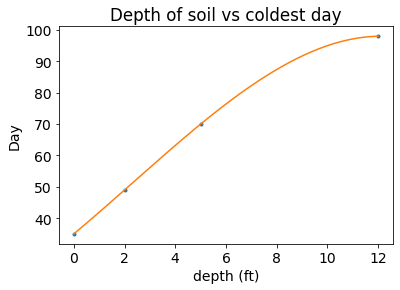

In [37]:
data_depth = np.array([0, 2, 5, 12])
data_coldest_day = np.array([35, 49, 70, 98])

depth_space = np.linspace(0, 12, 1000)

cold_day_interp = interp1d(data_depth, data_coldest_day, kind='cubic')

coldest_day_interp = cold_day_interp(depth_space)

depth = fsolve(lambda depth: cold_day_interp(depth) - 85, 8)[0]

print('The depth at which the coldest day would be March 26th has been estimated to be {D:.2f} feet'.format(D = depth))

plt.title('Depth of soil vs coldest day')
plt.ylabel('Day')
plt.xlabel('depth (ft)')
plt.plot(data_depth, data_coldest_day, '.')
plt.plot(depth_space, coldest_day_interp, '-');


# Leave 5 minutes for uploading your work

**Instructions**: Just like for Exams 2 and 3, you must submit your exam as a pdf file, but first make sure it is properly displaying the results from your Python code. To this end, do the following 
1. Run $\rightarrow$ Restart Kernel and Run All Cells
2. Covert the ipynb file to html (File $\rightarrow$ Export Notebook As $\rightarrow$ HTML)
3. Open the html file in your browser and _print to pdf_. Make sure file name has been changed to your personal name. When you print to pdf, you can shrink the size of the pdf (i.e. less than 100%) to make longer lines of code fit. 